### UK Anxiety 2023

In this notebook, we investigate anxiety across the UK using the 2023 ONS wellbeing local authority survey.

We show the best and worst districts, then map normalised data using a choropleth plot.

In [21]:
import matplotlib.pyplot as plt
import geopandas as gpd
import onspy

In [22]:
geojson_url = "https://raw.githubusercontent.com/martinjc/UK-GeoJSON/master/json/administrative/gb/lad.json"
gdf = gpd.read_file(geojson_url)

In [23]:
dataset_id = "wellbeing-local-authority"

In [24]:
print(onspy.ons_desc(dataset_id))

Title: Personal well-being estimates by local authority
ID: wellbeing-local-authority
Keywords: well-being
-----------
Description: Estimates of life satisfaction, feeling that the things done in life are worthwhile, happiness and anxiety at the UK, country, regional, county, local and unitary authority level.
-----------
Release Frequency: Annual
State: published
Next Release: TBC
-----------
Latest Version: 4
Edition(s): time-series
None


In [25]:
df = onspy.get_latest(dataset_id)

In [26]:
def filter_estimate(df, estimate_label):
    return (
        df[
            (df["Time"] == "2022-23") &
            (df["measure-of-wellbeing"] == "anxiety") &
            (df["wellbeing-estimate"] == estimate_label)
        ]
        .dropna(subset=["v4_3", "Geography"])
        .rename(columns={"v4_3": "Anxiety"})
    )

In [27]:
def print_anxiety_summary(df, title=""):
    df_sorted = df.sort_values("Anxiety", ascending=False)
    print(f"\n{title}\n{'-' * len(title)}")
    print("Top districts:\n", df_sorted[["Geography", "Anxiety"]].head(5).to_string(index=False))
    print("Bottom districts:\n", df_sorted[["Geography", "Anxiety"]].tail(5).to_string(index=False))
    print(f"Mean result: {df['Anxiety'].mean():.2f}")

In [28]:
df_mean = filter_estimate(df, "average-mean")
df_poor = filter_estimate(df, "poor")
df_vg = filter_estimate(df, "very-good")

In [29]:
def normalise_column(df, col, new_col):
    min_val = df[col].min()
    max_val = df[col].max()
    df[new_col] = ((df[col] - min_val) / (max_val - min_val)) * 10
    return df

df_mean = normalise_column(df_mean.copy(), "Anxiety", "normalised_index")

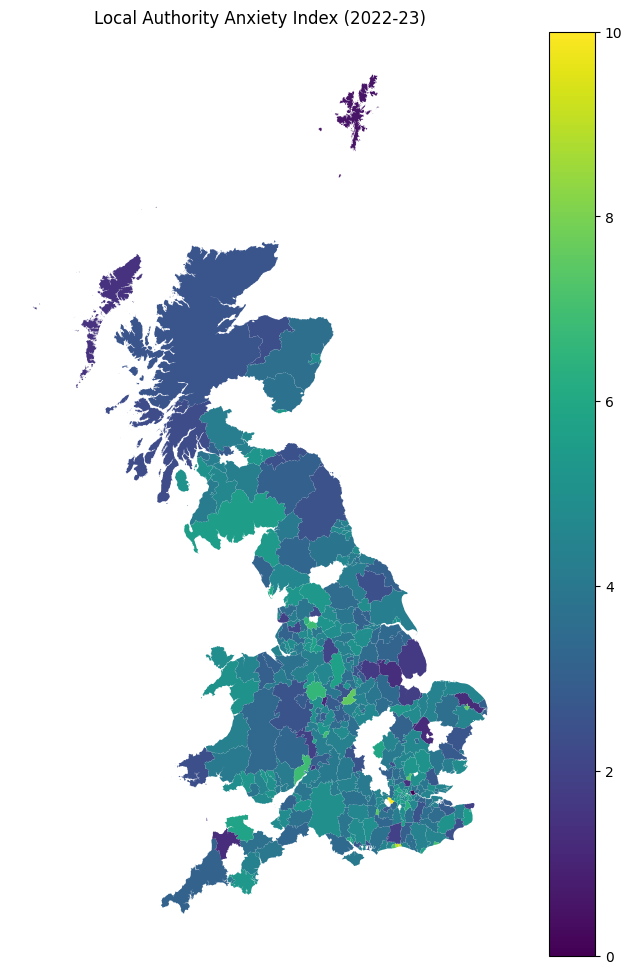


Average Mean
------------
Top districts:
                 Geography  Anxiety
               Spelthorne     5.16
                     Adur     4.84
                  Norwich     4.37
North West Leicestershire     4.35
                 Rushmoor     4.33
Bottom districts:
           Geography  Anxiety
East Cambridgeshire     2.25
      Cannock Chase     2.23
   Shetland Islands     2.04
         Mid Ulster     1.95
             Newham     1.86
Mean result: 3.21

Poor
----
Top districts:
  Geography  Anxiety
Spelthorne    50.28
  Rushmoor    45.70
      Adur    44.39
  Redditch    42.54
 Allerdale    40.10
Bottom districts:
           Geography  Anxiety
         Mid Ulster    10.97
             Newham    10.43
            Enfield    10.40
            Horsham     9.72
East Cambridgeshire     7.14
Mean result: 23.26

Very Good
---------
Top districts:
        Geography  Anxiety
      Mid Ulster    68.13
Shetland Islands    59.82
          Newham    57.46
  North Kesteven    57.17
        To

In [32]:
def plot_geodata_index(gdf, df, column, output_file="output.png", title="Local Authority Index"):
    merged = gdf.merge(df, left_on="LAD13CD", right_on="administrative-geography")
    fig, ax = plt.subplots(figsize=(10, 12))
    merged.plot(column=column, cmap="viridis", legend=True, ax=ax)
    ax.set_axis_off()
    plt.title(title)
    plt.savefig(output_file, dpi=1000)
    plt.show()

plot_geodata_index(
    gdf,
    df_mean,
    column="normalised_index",
    output_file="../assets/anxiety_index_22-23.png",
    title="Local Authority Anxiety Index (2022-23)"
)

print_anxiety_summary(df_mean, "Average Mean")
print_anxiety_summary(df_poor, "Poor")
print_anxiety_summary(df_vg, "Very Good")